In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time

In [2]:
 #Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# List of optimizers to experiment with
optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Adam': tf.keras.optimizers.Adam(),
    'Adagrad': tf.keras.optimizers.Adagrad(),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'Nadam': tf.keras.optimizers.Nadam()
}


In [4]:
# Define a simple CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
#Dictionary to store the results
results = {}

# Train and evaluate the model for each optimizer
for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer...")
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)
    end_time = time.time()


Training with SGD optimizer...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
619/938 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - accuracy: 0.4777 - loss: 1.7265

In [16]:
  # Save results for plotting
results[opt_name] = {'accuracy': history.history['accuracy'],'val_accuracy': history.history['val_accuracy'],'loss': history.history['loss'], 'val_loss': history.history['val_loss'], 'convergence_time': end_time - start_time
    }

# Plot the results for accuracy, loss and convergence time
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

KeyError: 'RMSprop'

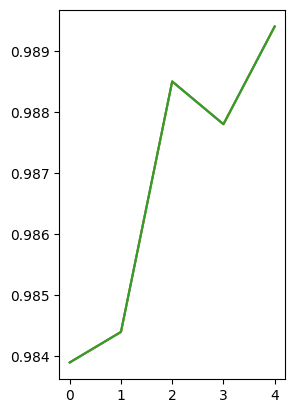

In [37]:
# Plot accuracy
plt.subplot(1, 2, 1)
for opt_name in optimizers:
    plt.plot(results[opt_name]['val_accuracy'], label=f'{opt_name} val_accuracy')
plt.title('Validation Accuracy for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()